In [2]:
import pandas as pd
import matplotlib.pyplot as plt

final_dataset = pd.read_csv("/Users/Loosimin/Desktop/final_dataset.csv")
final_dataset.head(2)

,County_FIPS_x,County,state_FIPS,State,pop_Year,pop_Population,pop_merge_indicator,pov_poverty_rate_percent,pov_merge_indicator,minc_median_income_USD_2021,...,FIPS|YEAR,County_FIPS_y,mort_year,mort_overdose_deaths,mort_merge_indicator,predicted_overdose_deaths_stochastic,_merge,pop_log_population,grams_morphine_per_cap,overdose_deaths_per_cap
0,1001,AUTAUGA,1,AL,2021,59203,both,10.7,both,"66,444",...,01001|2006,NaN,NaN,12.184398,Random Forest Predicted Values,12.184398,both,10.988727,0.288846,0.000203
1,1001,AUTAUGA,1,AL,2021,59203,both,10.7,both,"66,444",...,01001|2007,NaN,NaN,11.447327,Random Forest Predicted Values,11.447327,both,10.988727,0.323596,0.000186


## Florida

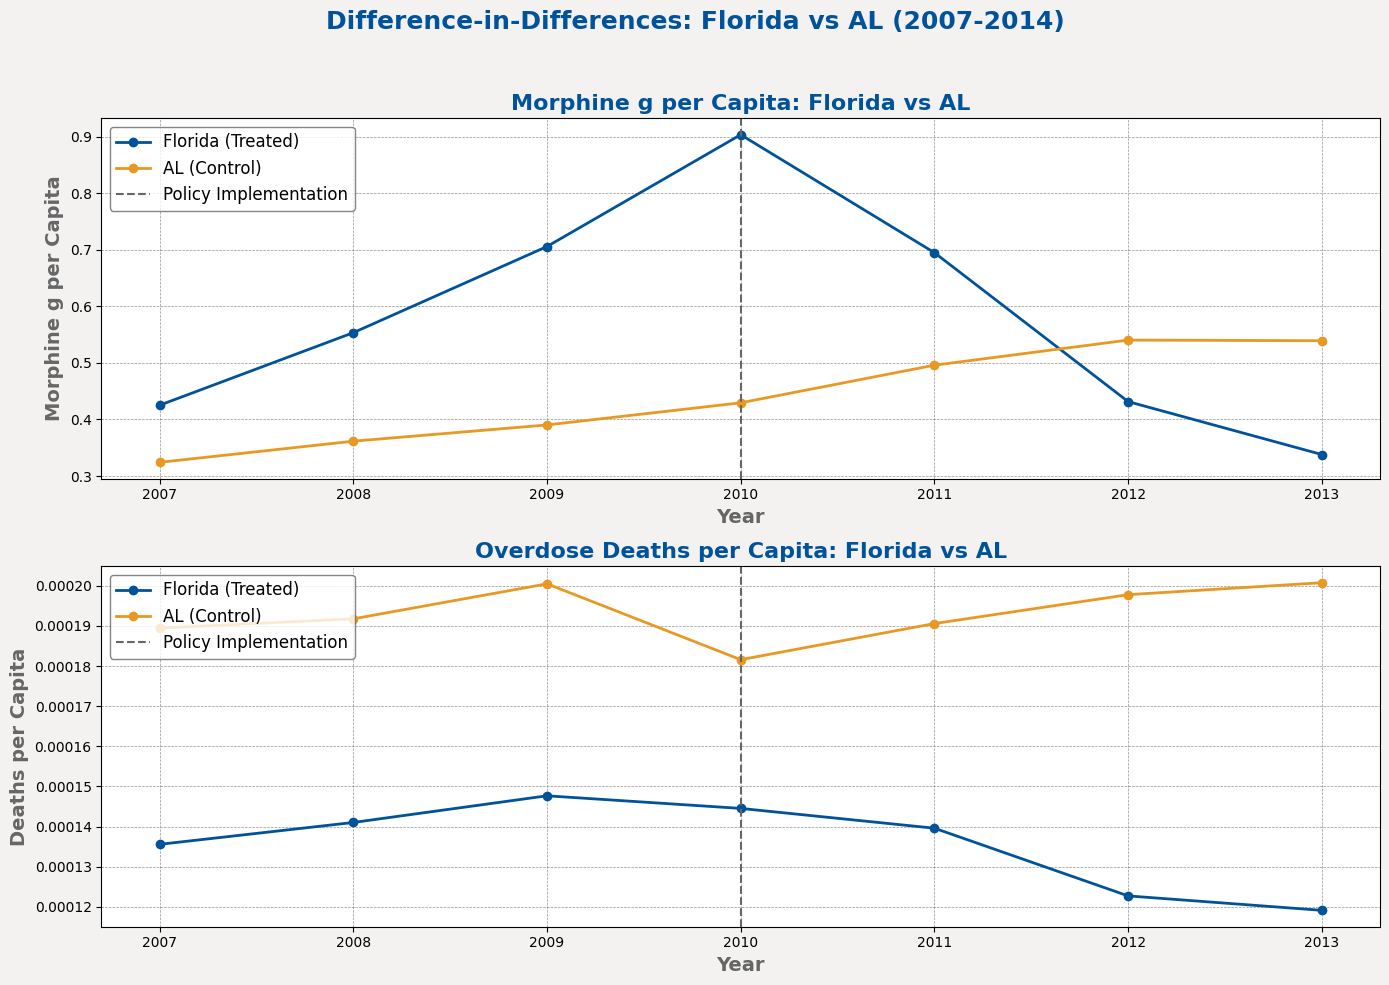

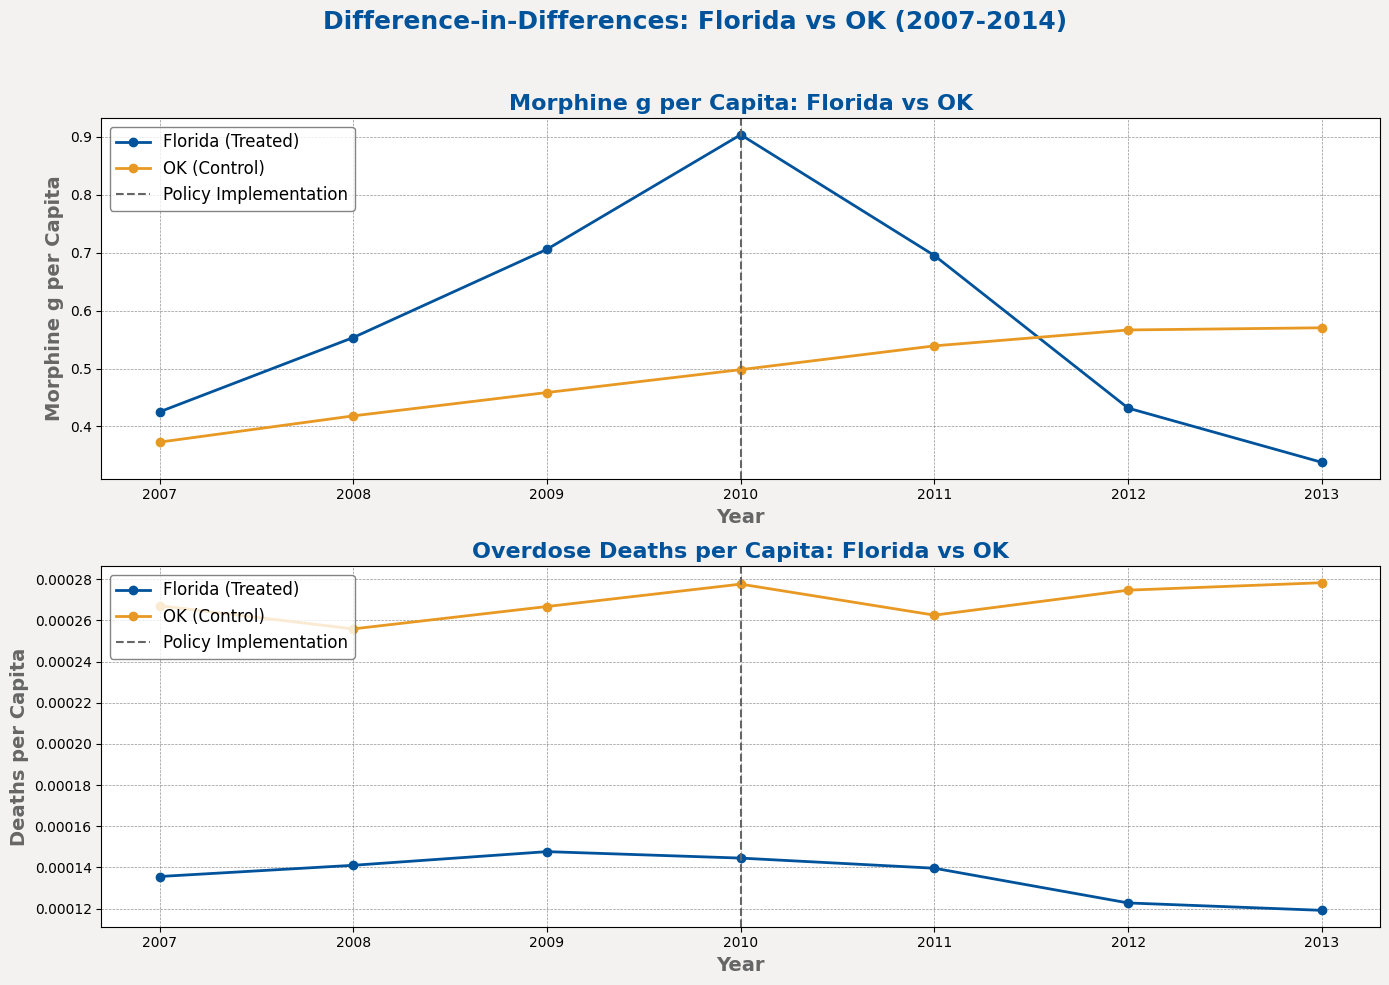

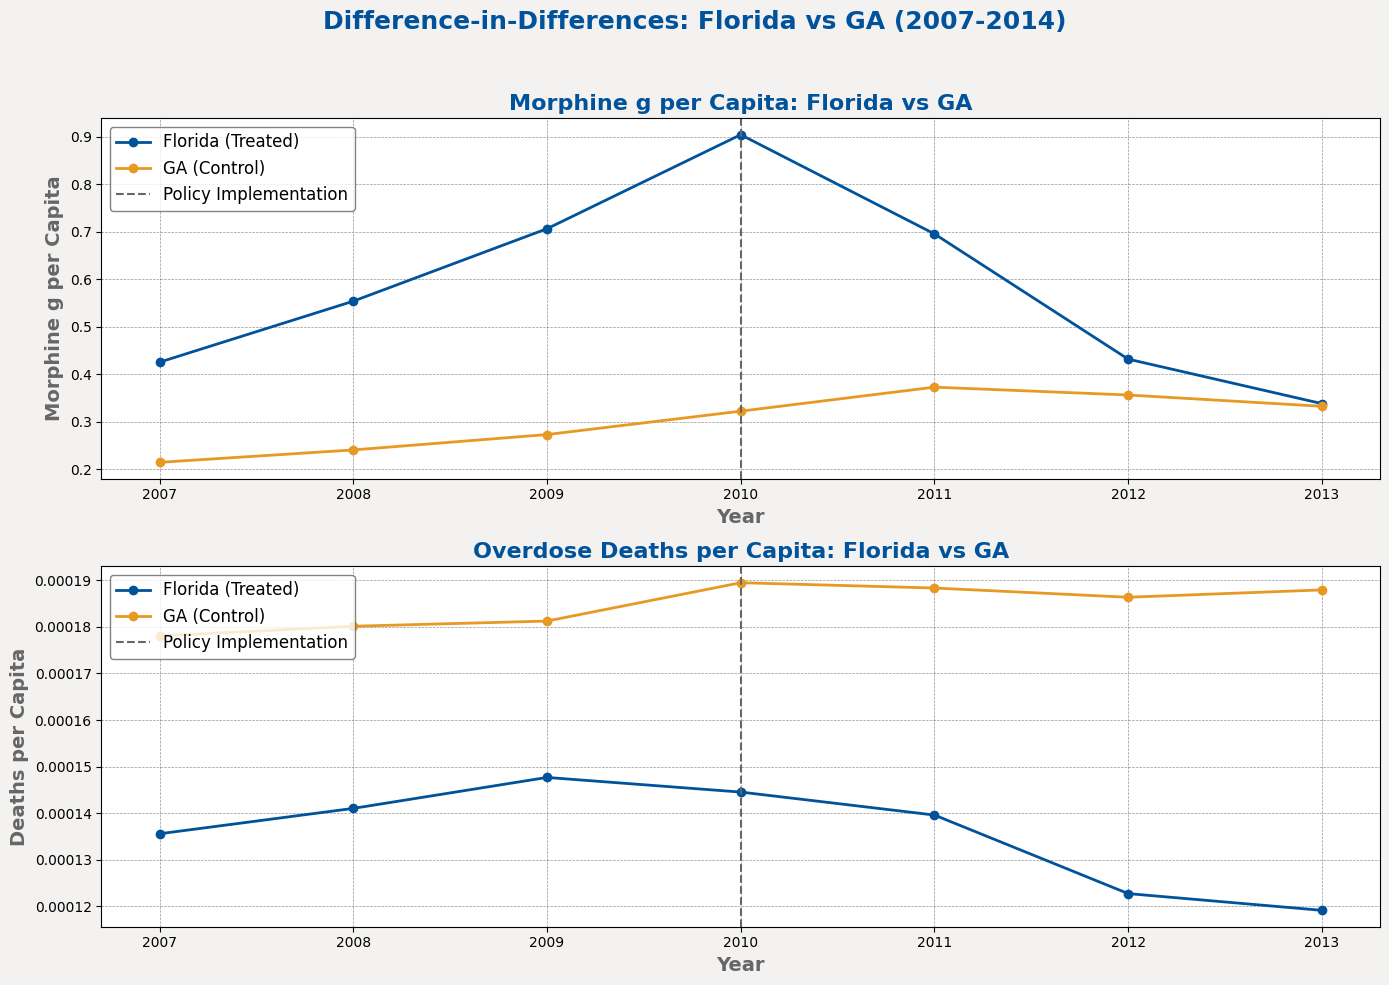

In [3]:
def create_did_charts_by_control(final_dataset, control_states):
    # Ensure 'opioid_YEAR' is numeric and drop invalid rows
    final_dataset["opioid_YEAR"] = pd.to_numeric(
        final_dataset["opioid_YEAR"], errors="coerce"
    )
    final_dataset = final_dataset.dropna(subset=["opioid_YEAR"])

    # Filter for years between 2007 and 2014
    final_dataset = final_dataset[
        (final_dataset["opioid_YEAR"] >= 2007) & (final_dataset["opioid_YEAR"] <= 2013)
    ]

    # Define Duke color palette
    duke_colors = {
        "blue": "#00539B",  # Duke Blue
        "gray": "#666666",  # Graphite
        "orange": "#E89923",  # Persimmon
        "green": "#339898",  # Eno
        "background": "#F3F2F1",  # Whisper Gray
    }

    # Loop through each control state
    for control_state in control_states:
        # Filter data for Florida (treated) and the current control state
        florida_data = final_dataset[final_dataset["State"] == "FL"]
        control_data = final_dataset[final_dataset["State"] == control_state]

        # Group by year and aggregate metrics for Florida
        fl_aggregated = (
            florida_data.groupby("opioid_YEAR")
            .agg(
                total_population=("pop_Population", "sum"),
                total_morphine=("opioid_morphine_equivalent_g", "sum"),
                total_deaths=("mort_overdose_deaths", "sum"),
            )
            .reset_index()
        )
        fl_aggregated["morphine_per_capita"] = (
            fl_aggregated["total_morphine"] / fl_aggregated["total_population"]
        )
        fl_aggregated["deaths_per_capita"] = (
            fl_aggregated["total_deaths"] / fl_aggregated["total_population"]
        )

        # Group by year and aggregate metrics for the control state
        control_aggregated = (
            control_data.groupby("opioid_YEAR")
            .agg(
                total_population=("pop_Population", "sum"),
                total_morphine=("opioid_morphine_equivalent_g", "sum"),
                total_deaths=("mort_overdose_deaths", "sum"),
            )
            .reset_index()
        )
        control_aggregated["morphine_per_capita"] = (
            control_aggregated["total_morphine"]
            / control_aggregated["total_population"]
        )
        control_aggregated["deaths_per_capita"] = (
            control_aggregated["total_deaths"] / control_aggregated["total_population"]
        )

        # Create subplots for the two charts
        fig, axes = plt.subplots(
            2, 1, figsize=(14, 10), facecolor=duke_colors["background"]
        )
        fig.suptitle(
            f"Difference-in-Differences: Florida vs {control_state} (2007-2014)",
            fontsize=18,
            weight="bold",
            color=duke_colors["blue"],
        )

        # Chart 1: Morphine per capita
        axes[0].plot(
            fl_aggregated["opioid_YEAR"],
            fl_aggregated["morphine_per_capita"],
            marker="o",
            color=duke_colors["blue"],
            label="Florida (Treated)",
            linewidth=2,
        )
        axes[0].plot(
            control_aggregated["opioid_YEAR"],
            control_aggregated["morphine_per_capita"],
            marker="o",
            color=duke_colors["orange"],
            label=f"{control_state} (Control)",
            linewidth=2,
        )
        # Add vertical line at 2010
        axes[0].axvline(
            x=2010,
            color=duke_colors["gray"],
            linestyle="--",
            linewidth=1.5,
            label="Policy Implementation",
        )
        axes[0].set_title(
            f"Morphine g per Capita: Florida vs {control_state}",
            fontsize=16,
            weight="bold",
            color=duke_colors["blue"],
        )
        axes[0].set_xlabel(
            "Year", fontsize=14, weight="bold", color=duke_colors["gray"]
        )
        axes[0].set_ylabel(
            "Morphine g per Capita",
            fontsize=14,
            weight="bold",
            color=duke_colors["gray"],
        )
        axes[0].grid(
            color=duke_colors["gray"], linestyle="--", linewidth=0.5, alpha=0.7
        )
        axes[0].legend(
            fontsize=12, loc="upper left", frameon=True, edgecolor=duke_colors["gray"]
        )

        # Chart 2: Overdose deaths per capita
        axes[1].plot(
            fl_aggregated["opioid_YEAR"],
            fl_aggregated["deaths_per_capita"],
            marker="o",
            color=duke_colors["blue"],
            label="Florida (Treated)",
            linewidth=2,
        )
        axes[1].plot(
            control_aggregated["opioid_YEAR"],
            control_aggregated["deaths_per_capita"],
            marker="o",
            color=duke_colors["orange"],
            label=f"{control_state} (Control)",
            linewidth=2,
        )
        # Add vertical line at 2010
        axes[1].axvline(
            x=2010,
            color=duke_colors["gray"],
            linestyle="--",
            linewidth=1.5,
            label="Policy Implementation",
        )
        axes[1].set_title(
            f"Overdose Deaths per Capita: Florida vs {control_state}",
            fontsize=16,
            weight="bold",
            color=duke_colors["blue"],
        )
        axes[1].set_xlabel(
            "Year", fontsize=14, weight="bold", color=duke_colors["gray"]
        )
        axes[1].set_ylabel(
            "Deaths per Capita", fontsize=14, weight="bold", color=duke_colors["gray"]
        )
        axes[1].grid(
            color=duke_colors["gray"], linestyle="--", linewidth=0.5, alpha=0.7
        )
        axes[1].legend(
            fontsize=12, loc="upper left", frameon=True, edgecolor=duke_colors["gray"]
        )

        # Adjust layout and show plot
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


# Call the function for Florida vs each control state
control_states = ["AL", "OK", "GA"]
create_did_charts_by_control(final_dataset=final_dataset, control_states=control_states)

## Washington

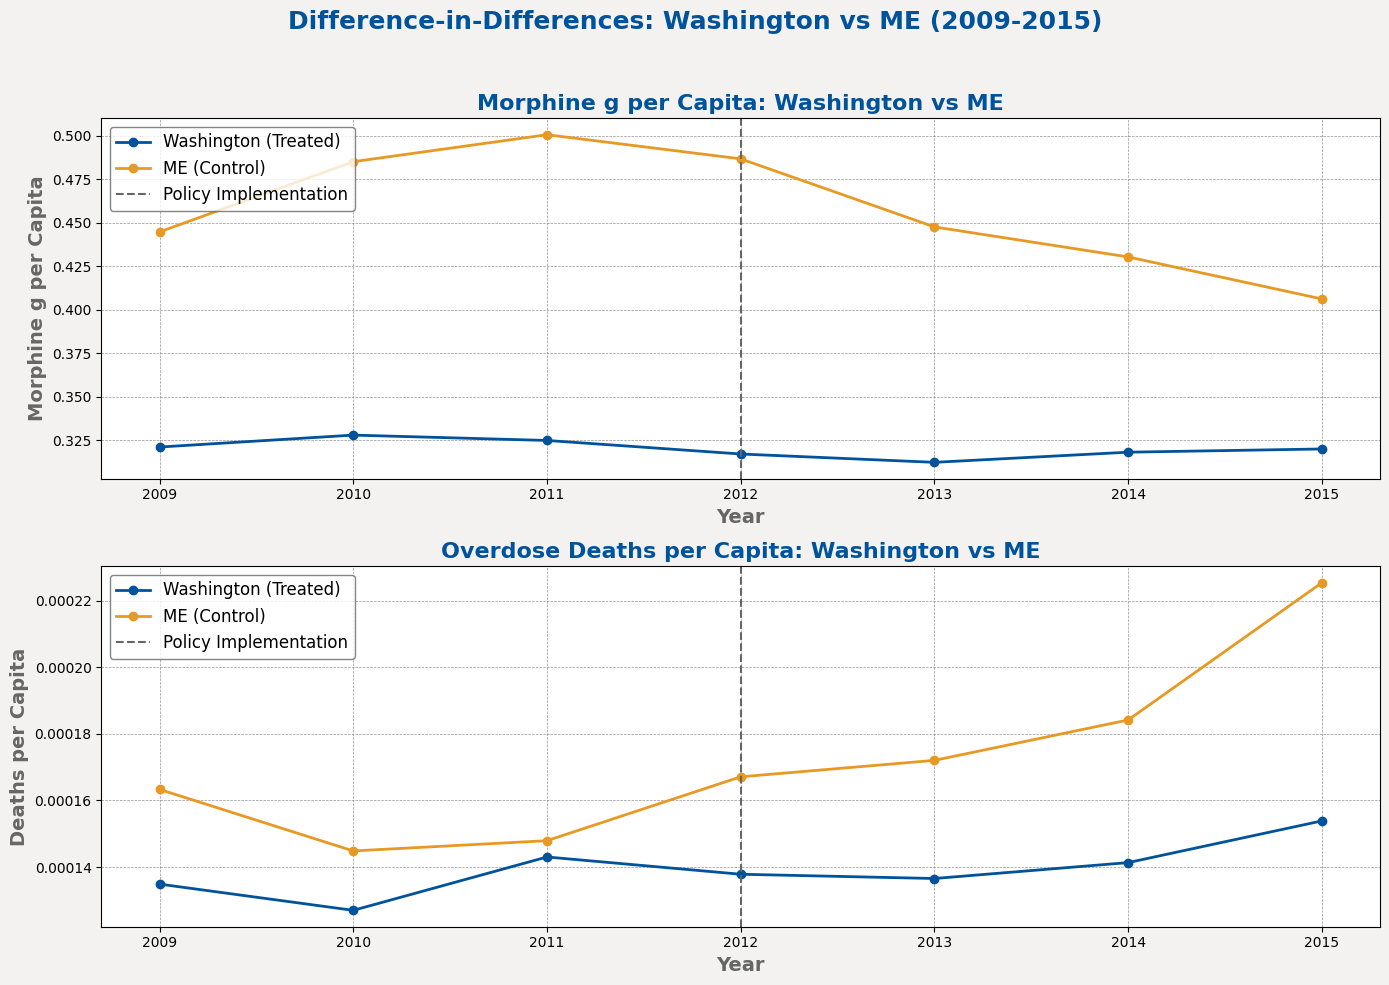

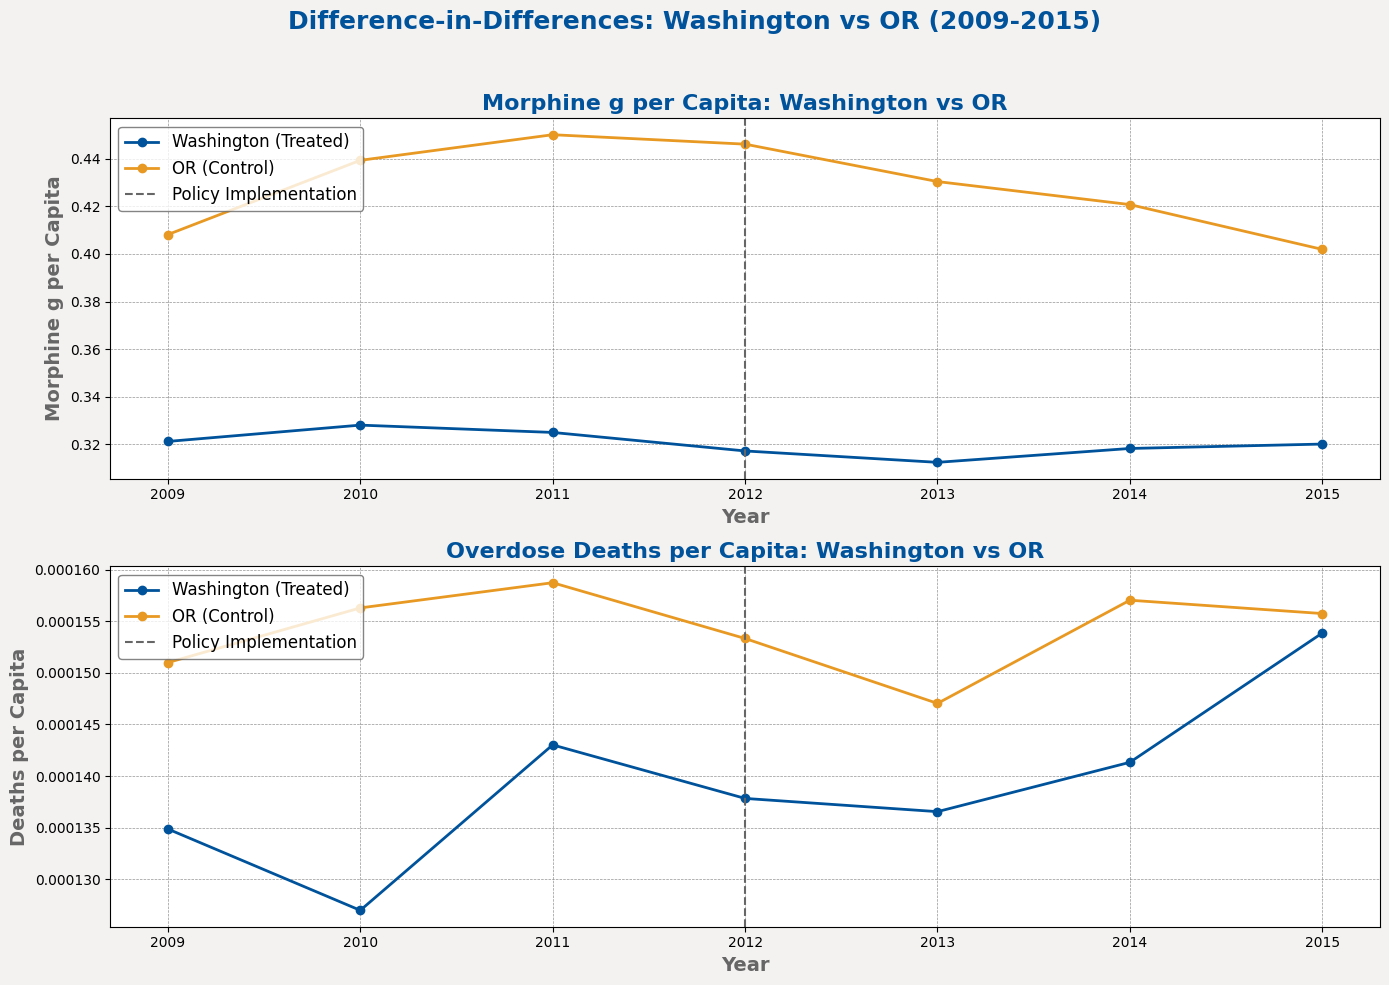

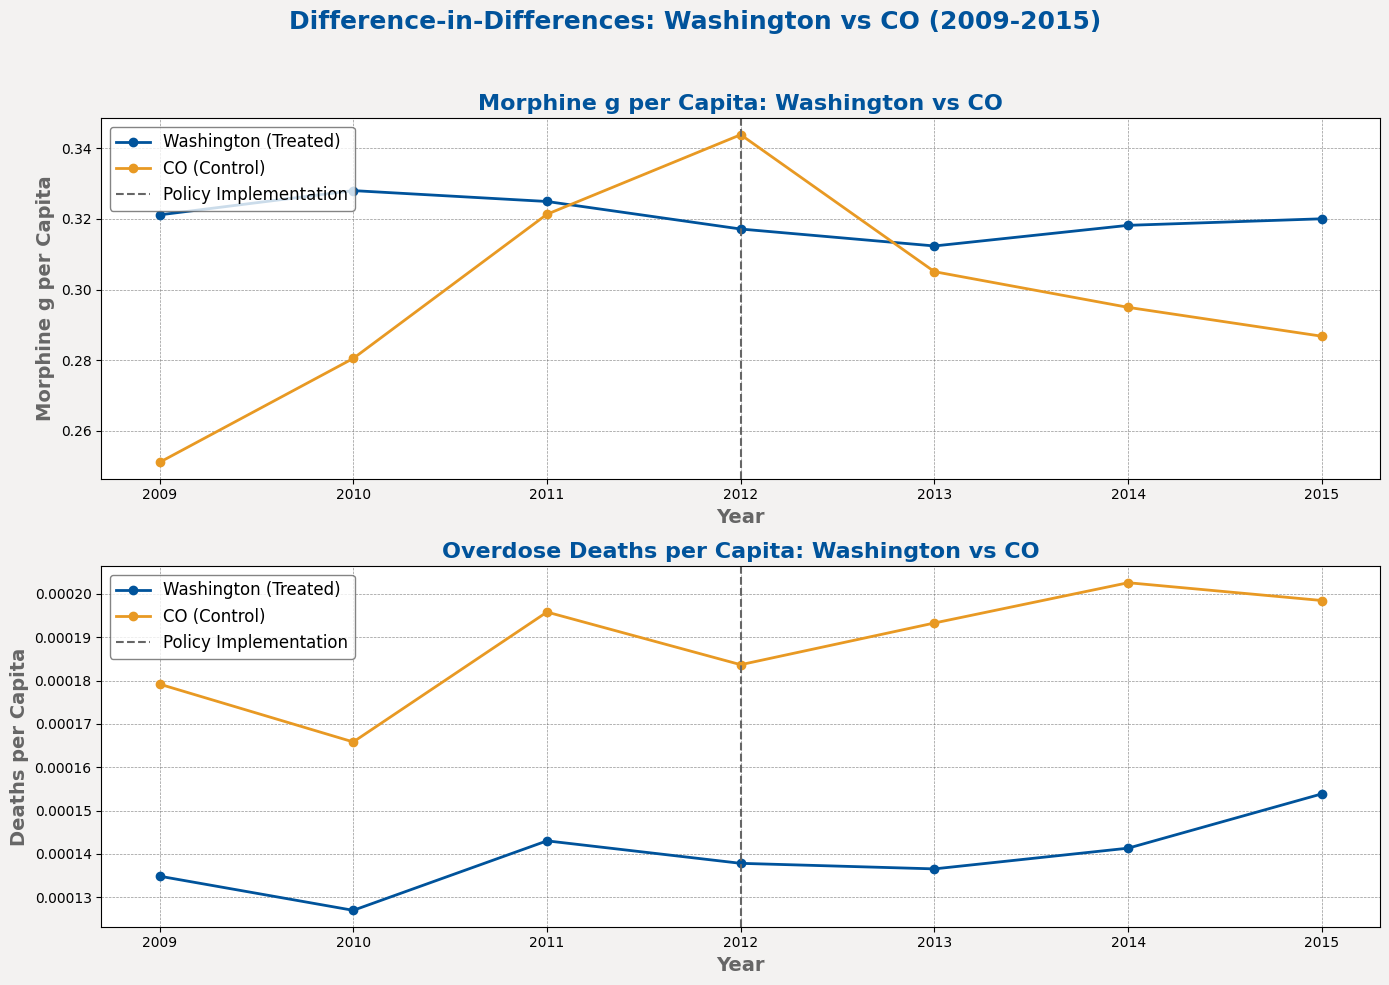

In [4]:
import matplotlib.pyplot as plt


def create_did_charts_washington_by_control(final_dataset, control_states):
    # Ensure 'opioid_YEAR' is numeric and drop invalid rows
    final_dataset["opioid_YEAR"] = pd.to_numeric(
        final_dataset["opioid_YEAR"], errors="coerce"
    )
    final_dataset = final_dataset.dropna(subset=["opioid_YEAR"])

    # Filter for years between 2009 and 2015
    final_dataset = final_dataset[
        (final_dataset["opioid_YEAR"] >= 2009) & (final_dataset["opioid_YEAR"] <= 2015)
    ]

    # Define Duke color palette
    duke_colors = {
        "blue": "#00539B",  # Duke Blue
        "gray": "#666666",  # Graphite
        "orange": "#E89923",  # Persimmon
        "green": "#339898",  # Eno
        "background": "#F3F2F1",  # Whisper Gray
    }

    # Loop through each control state
    for control_state in control_states:
        # Filter data for Washington (treated) and the current control state
        washington_data = final_dataset[final_dataset["State"] == "WA"]
        control_data = final_dataset[final_dataset["State"] == control_state]

        # Group by year and aggregate metrics for Washington
        wa_aggregated = (
            washington_data.groupby("opioid_YEAR")
            .agg(
                total_population=("pop_Population", "sum"),
                total_morphine=("opioid_morphine_equivalent_g", "sum"),
                total_deaths=("mort_overdose_deaths", "sum"),
            )
            .reset_index()
        )
        wa_aggregated["morphine_per_capita"] = (
            wa_aggregated["total_morphine"] / wa_aggregated["total_population"]
        )
        wa_aggregated["deaths_per_capita"] = (
            wa_aggregated["total_deaths"] / wa_aggregated["total_population"]
        )

        # Group by year and aggregate metrics for the control state
        control_aggregated = (
            control_data.groupby("opioid_YEAR")
            .agg(
                total_population=("pop_Population", "sum"),
                total_morphine=("opioid_morphine_equivalent_g", "sum"),
                total_deaths=("mort_overdose_deaths", "sum"),
            )
            .reset_index()
        )
        control_aggregated["morphine_per_capita"] = (
            control_aggregated["total_morphine"]
            / control_aggregated["total_population"]
        )
        control_aggregated["deaths_per_capita"] = (
            control_aggregated["total_deaths"] / control_aggregated["total_population"]
        )

        # Create subplots for the two charts
        fig, axes = plt.subplots(
            2, 1, figsize=(14, 10), facecolor=duke_colors["background"]
        )
        fig.suptitle(
            f"Difference-in-Differences: Washington vs {control_state} (2009-2015)",
            fontsize=18,
            weight="bold",
            color=duke_colors["blue"],
        )

        # Chart 1: Morphine per capita
        axes[0].plot(
            wa_aggregated["opioid_YEAR"],
            wa_aggregated["morphine_per_capita"],
            marker="o",
            color=duke_colors["blue"],
            label="Washington (Treated)",
            linewidth=2,
        )
        axes[0].plot(
            control_aggregated["opioid_YEAR"],
            control_aggregated["morphine_per_capita"],
            marker="o",
            color=duke_colors["orange"],
            label=f"{control_state} (Control)",
            linewidth=2,
        )
        axes[0].axvline(
            x=2012,
            color=duke_colors["gray"],
            linestyle="--",
            linewidth=1.5,
            label="Policy Implementation",
        )
        axes[0].set_title(
            f"Morphine g per Capita: Washington vs {control_state}",
            fontsize=16,
            weight="bold",
            color=duke_colors["blue"],
        )
        axes[0].set_xlabel(
            "Year", fontsize=14, weight="bold", color=duke_colors["gray"]
        )
        axes[0].set_ylabel(
            "Morphine g per Capita",
            fontsize=14,
            weight="bold",
            color=duke_colors["gray"],
        )
        axes[0].grid(
            color=duke_colors["gray"], linestyle="--", linewidth=0.5, alpha=0.7
        )
        axes[0].legend(
            fontsize=12, loc="upper left", frameon=True, edgecolor=duke_colors["gray"]
        )

        # Chart 2: Overdose deaths per capita
        axes[1].plot(
            wa_aggregated["opioid_YEAR"],
            wa_aggregated["deaths_per_capita"],
            marker="o",
            color=duke_colors["blue"],
            label="Washington (Treated)",
            linewidth=2,
        )
        axes[1].plot(
            control_aggregated["opioid_YEAR"],
            control_aggregated["deaths_per_capita"],
            marker="o",
            color=duke_colors["orange"],
            label=f"{control_state} (Control)",
            linewidth=2,
        )
        axes[1].axvline(
            x=2012,
            color=duke_colors["gray"],
            linestyle="--",
            linewidth=1.5,
            label="Policy Implementation",
        )
        axes[1].set_title(
            f"Overdose Deaths per Capita: Washington vs {control_state}",
            fontsize=16,
            weight="bold",
            color=duke_colors["blue"],
        )
        axes[1].set_xlabel(
            "Year", fontsize=14, weight="bold", color=duke_colors["gray"]
        )
        axes[1].set_ylabel(
            "Deaths per Capita", fontsize=14, weight="bold", color=duke_colors["gray"]
        )
        axes[1].grid(
            color=duke_colors["gray"], linestyle="--", linewidth=0.5, alpha=0.7
        )
        axes[1].legend(
            fontsize=12, loc="upper left", frameon=True, edgecolor=duke_colors["gray"]
        )

        # Adjust layout and show plot
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


# Call the function for Washington vs each control state
control_states = ["ME", "OR", "CO"]
create_did_charts_washington_by_control(
    final_dataset=final_dataset, control_states=control_states
)